In [1]:
# Start by importing relevant python modules
import numpy as np
import pandas as pd
import sklearn
from sklearn import model_selection, neighbors
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_accidents = pd.read_csv('dataset/uk_accidents_for_sev_prediction.csv')

In [3]:
features = df_accidents.drop('Severe_Accident', axis=1)
target = df_accidents['Severe_Accident']

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size=0.2, random_state=8)

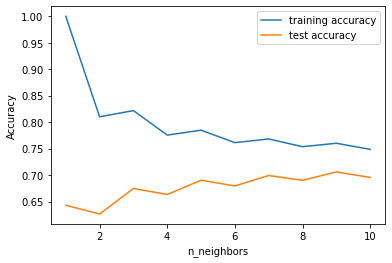

In [15]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [5]:
from sklearn import linear_model

In [6]:
logreg = linear_model.LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.765
Test set score: 0.765


In [7]:
from sklearn import naive_bayes

In [8]:
nbg = naive_bayes.GaussianNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(nbg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(nbg.score(X_test, y_test)))

Training set score: 0.727
Test set score: 0.730


In [9]:
from sklearn import tree

In [10]:
b_tree = tree.DecisionTreeClassifier(max_depth=8, random_state=0)
b_tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(b_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(b_tree.score(X_test, y_test)))

Accuracy on training set: 0.816
Accuracy on test set: 0.815


In [11]:
print("Feature importances:\n{}".format(b_tree.feature_importances_))

Feature importances:
[1.23525241e-03 2.54252588e-03 1.05404265e-03 1.16788162e-03
 9.74795826e-02 2.73969087e-01 6.62532028e-04 1.95621766e-04
 2.33241313e-01 2.39360830e-03 3.88414818e-03 3.51641904e-03
 4.20868560e-02 9.15011644e-03 8.33325061e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.80184682e-04 7.84152464e-05
 8.53099019e-04 1.59783445e-04 8.61179199e-05 2.84357061e-04
 1.21599696e-03 0.00000000e+00 0.00000000e+00 6.47106617e-05
 1.25980350e-01 2.55695595e-04 4.20969947e-04 1.97219378e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.05015948e-05 1.85490127e-01 0.00000000e+00
 5.72853285e-04 6.29617249e-05 6.06441419e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.72455785e-05 0.00000000e+00
 1.21230173e-04 0.00000000e+00 4.92240728e-05 1.08260609e-04
 0.00000000e+00 1.29565230e-04 8.08838436e-05 7.65938844e-05
 0.00000000e+00]


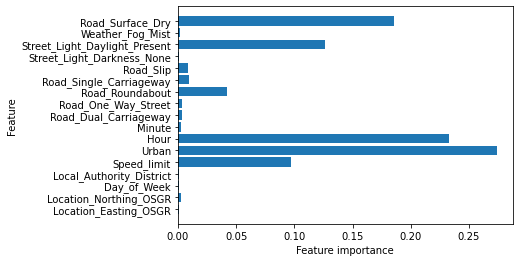

In [12]:
def plot_feature_importances(model):
    imps = []
    imp_names = []
    for imp, imp_name in zip(model.feature_importances_, features.columns):
        if imp > 0.001:
            imps.append(imp)
            imp_names.append(imp_name)
        
    n_features = len(imp_names)
    plt.barh(range(n_features), imps, align='center')
    plt.yticks(np.arange(n_features), imp_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(b_tree)

In [13]:
from sklearn import ensemble

In [14]:
rf = ensemble.RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))

Training set score: 0.987
Test set score: 0.790
